# The Financial Instrument Class

In [1]:
class FinancialInstrument():
    pass

In [2]:
stock = FinancialInstrument()
stock

In [4]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

In [6]:
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')
stock

In [7]:
stock.ticker

'AAPL'

In [8]:
stock.start

'2015-01-01'

In [9]:
stock.end

'2019-12-31'

## get_data Method

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np

In [12]:
yf.download('AAPL', '2015-01-01', '2019-12-31').Close.to_frame()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [13]:
raw = yf.download('AAPL', '2015-01-01', '2019-12-31').Close.to_frame()
raw

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [14]:
raw.rename(columns={'Close':'price'}, inplace=True)
raw

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [41]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={'Close':'price'}, inplace=True)
        self.data = raw

In [42]:
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [43]:
stock.data

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


## log_returns Method

In [45]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={'Close':'price'}, inplace=True)
        self.data = raw
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))

In [46]:
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')
stock.data

[*********************100%***********************]  1 of 1 completed


,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


## String Representation with the __repr__() Method

In [47]:
print(stock)

In [48]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self.ticker, self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={'Close':'price'}, inplace=True)
        self.data = raw
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))

In [49]:
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')
print(stock)

[*********************100%***********************]  1 of 1 completed
FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)


## The plot_data and plot_returns Methods

In [56]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

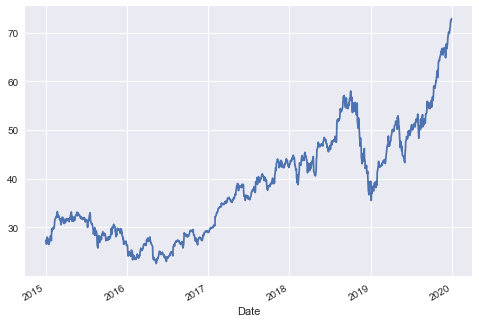

In [57]:
stock.data.price.plot()
plt.show()

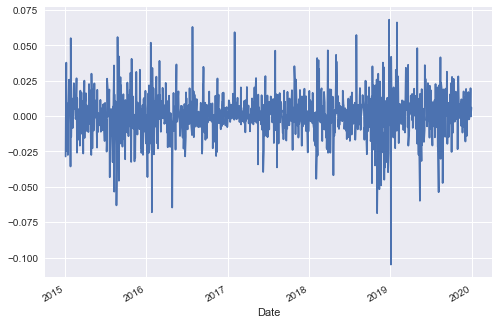

In [58]:
stock.data.log_returns.plot()
plt.show()

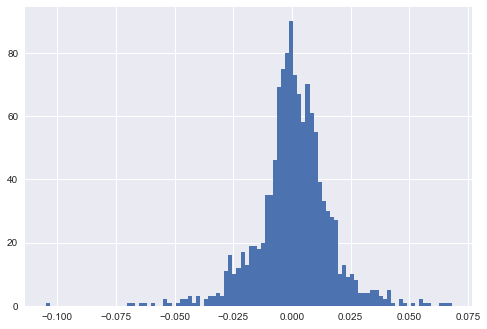

In [59]:
stock.data.log_returns.hist(bins=100)
plt.show()

In [66]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self.ticker, self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={'Close':'price'}, inplace=True)
        self.data = raw
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
    def plot_prices(self):
        self.data.price.plot(figsize=(12,8))
        plt.title('Price Chart: {}'.format(self.ticker, fontsize=15))
    def plot_returns(self, kind='ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize=(12,8))
            plt.title('Returns: {}'.format(self.ticker), fontsize=15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins=int(np.sqrt(len(self.data))))
            plt.title('Frequency of Returns: {}'.format(self.ticker, fontsize=15))

In [67]:
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed


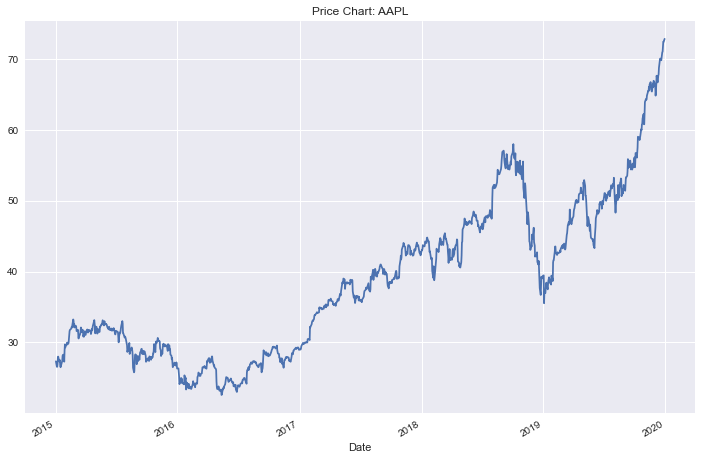

In [68]:
stock.plot_prices()

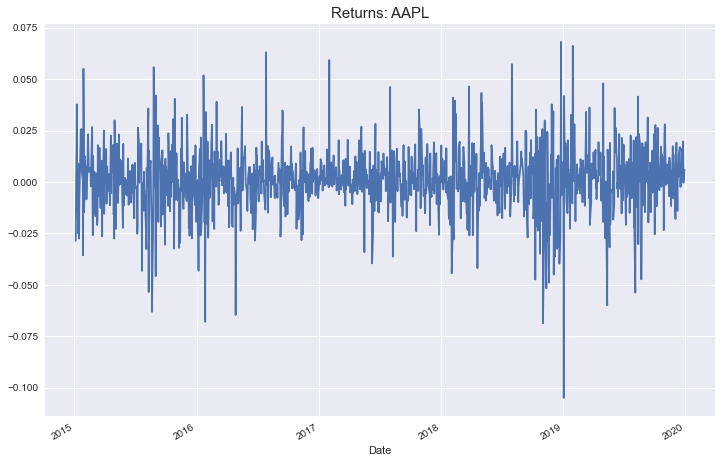

In [69]:
stock.plot_returns()

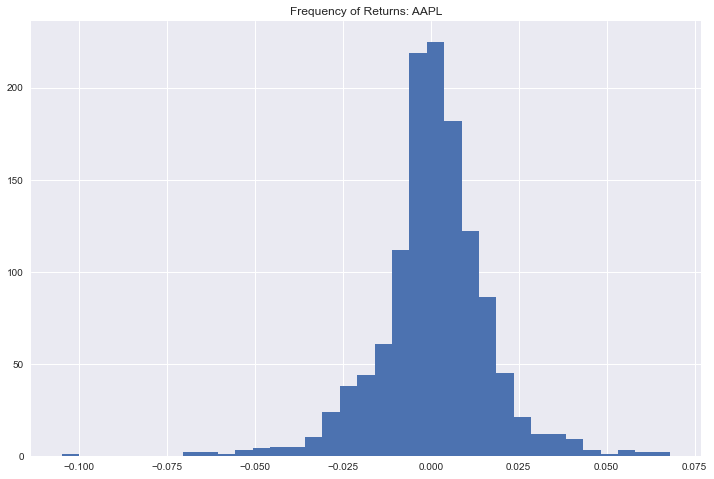

In [70]:
stock.plot_returns('hist')

# Encapsulation and Protected Attributes
* underscore in front of attribute hides the attribute
* Python doesn't have real private

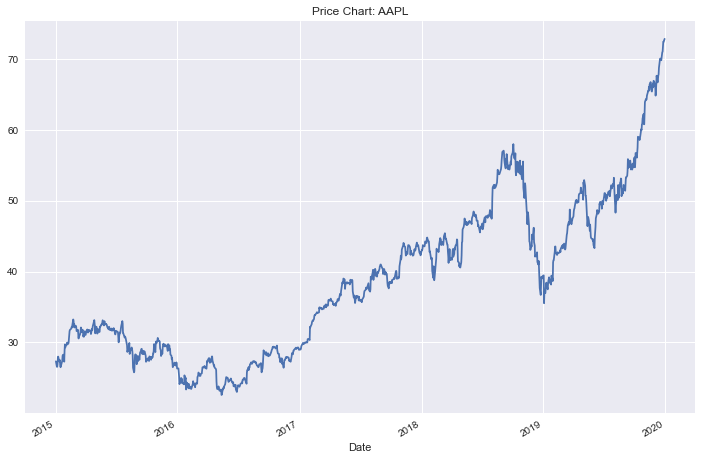

In [71]:
stock.plot_prices()

In [72]:
stock.ticker

'AAPL'

In [73]:
stock.ticker = 'GE'

In [74]:
stock.ticker

'GE'

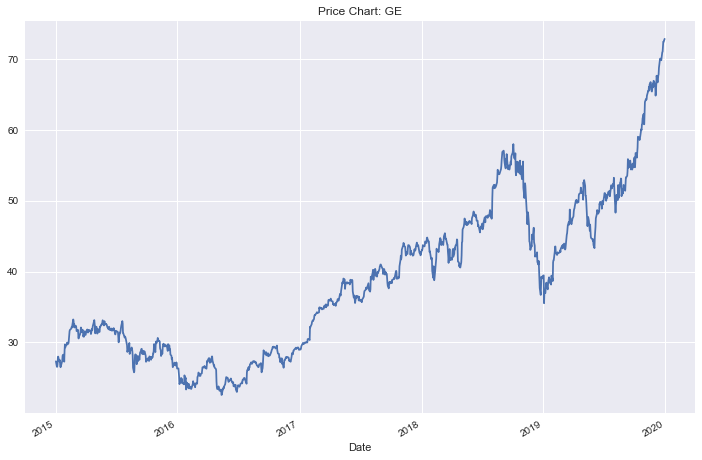

In [75]:
stock.plot_prices()

In [86]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={'Close':'price'}, inplace=True)
        self.data = raw
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
    def plot_prices(self):
        self.data.price.plot(figsize=(12,8))
        plt.title('Price Chart: {}'.format(self._ticker, fontsize=15))
    def plot_returns(self, kind='ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize=(12,8))
            plt.title('Returns: {}'.format(self._ticker), fontsize=15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins=int(np.sqrt(len(self.data))))
            plt.title('Frequency of Returns: {}'.format(self._ticker, fontsize=15))
    def set_ticker(self, ticker=None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [87]:
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed


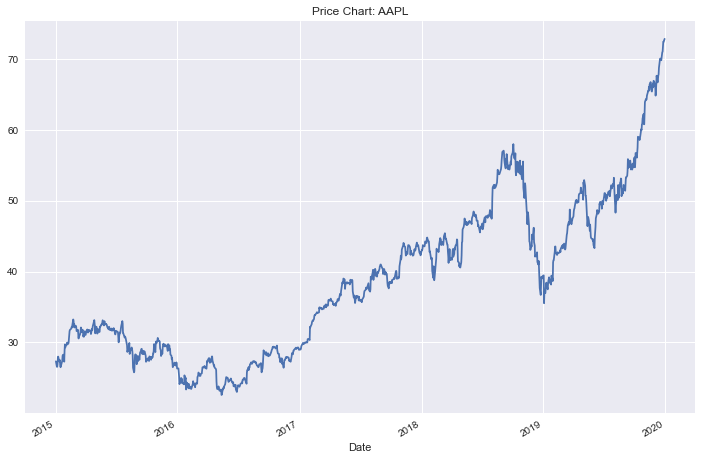

In [88]:
stock.plot_prices()

In [89]:
stock.set_ticker('GE')

[*********************100%***********************]  1 of 1 completed


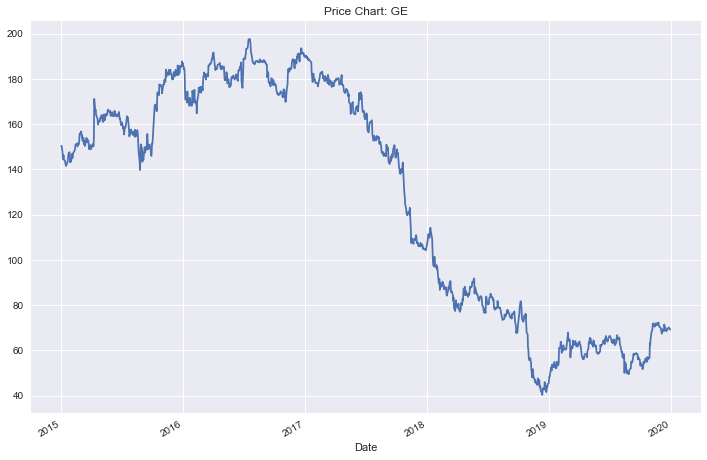

In [90]:
stock.plot_prices()